In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from fibheap import FibonacciHeap as FibHeap
from peel_by_motif import *
from utils import *

import random
import pandas as pd
from datetime import datetime
from compare_algs.greedy_algorithms import *
import graph_tool.all as gt

In [2]:

plt.rcParams.update({'font.size': 14})

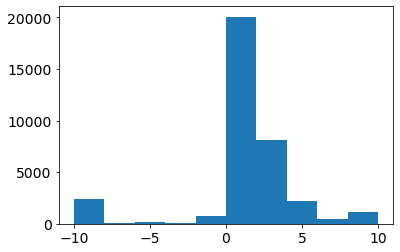

In [3]:
df = pd.read_csv('data/soc-sign-bitcoinotc.csv', names=['source','sink','rate','time'])
G = nx.from_pandas_edgelist(df, 'source', 'sink',['rate'], create_using=nx.DiGraph())
total_vs = plt.hist(df['rate'])
plt.show()

In [4]:
len(G.nodes), len(G.edges)

(5881, 35592)

In [5]:
index = 0
gt_node_map = {}
for n in G.nodes:
    gt_node_map[n] = index
    index += 1
g = gt.Graph()
for row in df[['source','sink','rate']].values:
    g.add_edge(gt_node_map[row[0]], gt_node_map[row[1]])

In [6]:
start=datetime.now()
motif3 = gt.motifs(g, 3, return_maps=True)
print(datetime.now()-start)

0:00:17.308417


0 153801


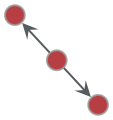

1 36648


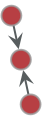

2 65143


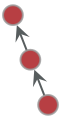

3 3706


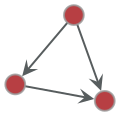

4 440712


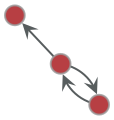

5 169731


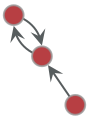

6 79


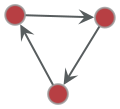

7 2910


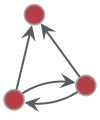

8 2048


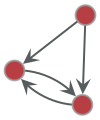

9 729665


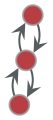

10 1621


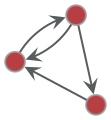

11 9377


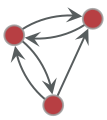

12 13752


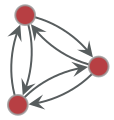

In [21]:
i = 0


for motif_shape in motif3[0]:
    print(i, motif3[1][i])
    i += 1
    pos = gt.sfdp_layout(motif_shape)
    gt.graph_draw(motif_shape,pos,output_size=(60,60))
#     gt.graph_draw(motif_shape,pos,output_size=(60,60), output='figs/motif/3motif_'+str(i)+'.pdf')
#     plt.savefig('figs/motif/3motif_'+str(i)+'.png')
    plt.show()

In [6]:
num_labeled_G = nx.relabel_nodes(G, gt_node_map)

# random graph

In [7]:
import random
indeg = [i[1] for i in G.in_degree]
outdeg = [i[1] for i in G.out_degree]
lamd = sum([i*j for i in indeg for j in outdeg])/2/len(G.edges)

rand_G = gt.Graph()
rand_G.add_vertex((len(indeg)))
for i in range(len(indeg)):
    for j in range(len(outdeg)):
        if i!=j and random.uniform(0, 1)<indeg[i]*outdeg[j]/lamd:
            rand_G.add_edge(i,j)
rand_motif3 = gt.motifs(rand_G, 3)

[]

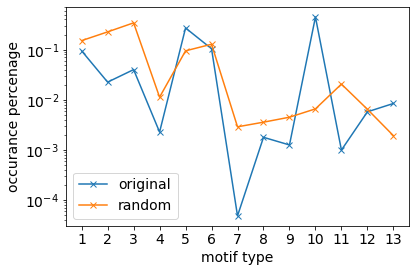

In [8]:
plt.plot([str(i) for i in range(1,14)], [i/sum(motif3[1]) for i in motif3[1]],marker='x',label='original')
plt.plot([str(i) for i in range(1,14)], [i/sum(rand_motif3[1]) for i in rand_motif3[1]],marker='x',label='random')
plt.yscale('log')
plt.xlabel('motif type')
plt.ylabel('occurance percenage')
plt.legend()
plt.tight_layout()
plt.savefig('figs/bitcoin_otc/compare_random.png')
plt.plot()

# ranging neg and pos values give same result

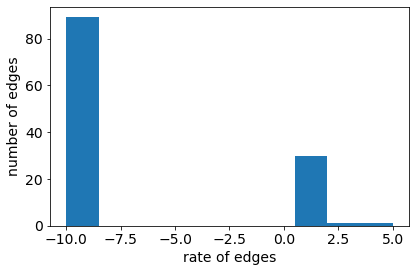

<ipython-input-24-283d0267bcef>:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


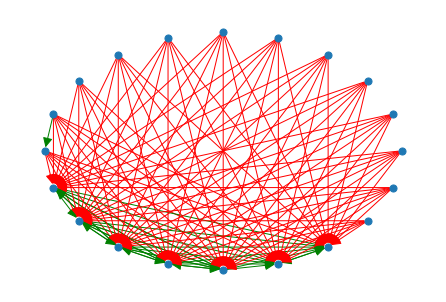

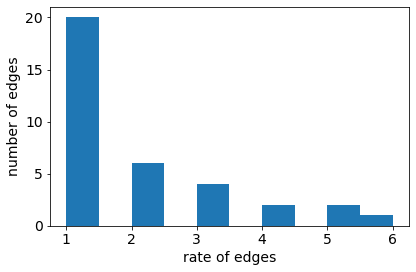

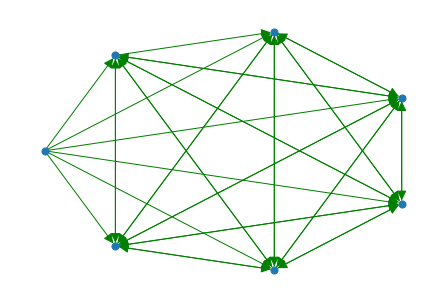

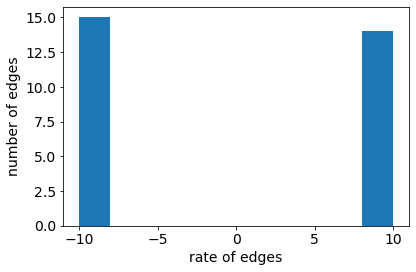

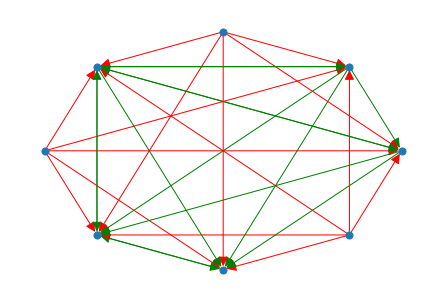

In [24]:
h_list = []
removed_nodes = []
pairs= [([list(i) for i in motif3[2][8]],1),([list(i) for i in motif3[2][9]],-1)]
for i in range(3):
#     print('!!', len(pairs[0][0]))
    node_d, fibheap = init_heap_and_dict(pairs)
    results = peel_by_motif(node_d, fibheap, pairs, 1, False)
    H = num_labeled_G.subgraph(results[1])
    removed_nodes += list(H.nodes)
    h_list.append(H)
    
    rates = nx.get_edge_attributes(H, "rate")
    value_list = list(rates.values())
    vs = plt.hist(value_list)
    plt.ylabel('number of edges')
    plt.xlabel('rate of edges')
    plt.tight_layout()
    plt.savefig('figs/bitcoin_otc/contrast_9_10_hist'+str(i)+'.png')
    plt.show()
    
    colors = ['g' if H[u][v]['rate']>0 else 'r' for u,v in H.edges]
    nx.draw_shell(H, node_size=50, edge_color=colors, arrowsize=20)
    plt.tight_layout()
    plt.savefig('figs/bitcoin_otc/contrast_9_10_shape'+str(i)+'.png')
    plt.show()
    
    new_pairs = []
    for pair in pairs:
        temp_motif_list = []
#         print(len(pair[0]))
        for motif in pair[0]:
#             print(motif)
            flag = 0
            for node in motif:
                
                if node in removed_nodes:
                    flag = 1
                    break
            if flag == 0:
                temp_motif_list.append(motif)
        new_pairs.append((temp_motif_list, pair[1]))
#         print(len(temp_motif_list))
    pairs = new_pairs

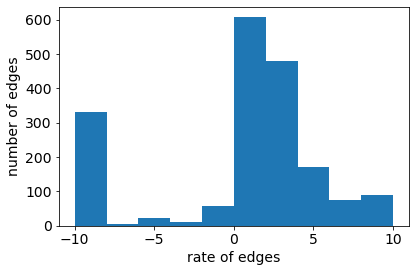

<ipython-input-7-5bb7197f5047>:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


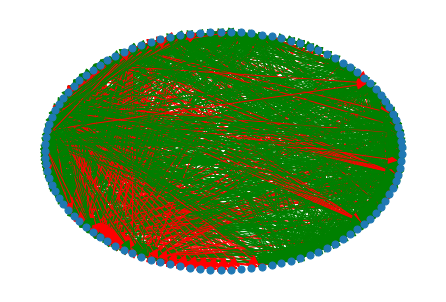

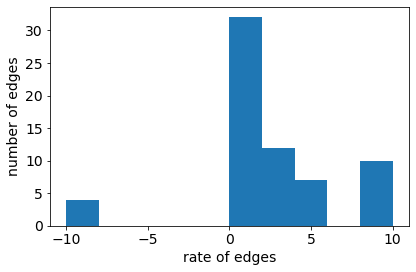

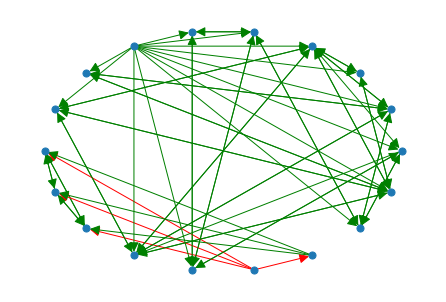

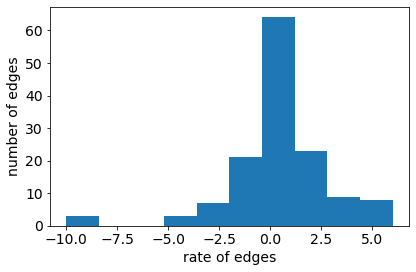

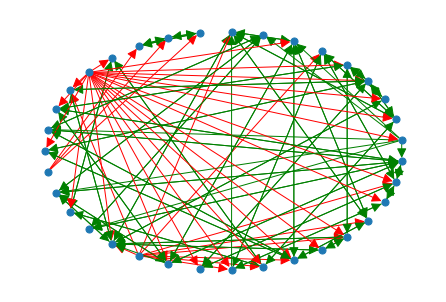

In [7]:
h_list = []
removed_nodes = []
pairs= [([list(i) for i in motif3[2][8]],1)]
for i in range(3):
#     print('!!', len(pairs[0][0]))
    node_d, fibheap = init_heap_and_dict(pairs)
    results = peel_by_motif(node_d, fibheap, pairs, 1, False)
    H = num_labeled_G.subgraph(results[1])
    removed_nodes += list(H.nodes)
    h_list.append(H)
    
    rates = nx.get_edge_attributes(H, "rate")
    value_list = list(rates.values())
    vs = plt.hist(value_list)
    plt.ylabel('number of edges')
    plt.xlabel('rate of edges')
    plt.tight_layout()
#     plt.savefig('figs/bitcoin_otc/contrast_9_10_hist'+str(i)+'.png')
    plt.show()
    
    colors = ['g' if H[u][v]['rate']>0 else 'r' for u,v in H.edges]
    nx.draw_shell(H, node_size=50, edge_color=colors, arrowsize=20)
    plt.tight_layout()
#     plt.savefig('figs/bitcoin_otc/contrast_9_10_shape'+str(i)+'.png')
    plt.show()
    
    new_pairs = []
    for pair in pairs:
        temp_motif_list = []
#         print(len(pair[0]))
        for motif in pair[0]:
#             print(motif)
            flag = 0
            for node in motif:
                
                if node in removed_nodes:
                    flag = 1
                    break
            if flag == 0:
                temp_motif_list.append(motif)
        new_pairs.append((temp_motif_list, pair[1]))
#         print(len(temp_motif_list))
    pairs = new_pairs

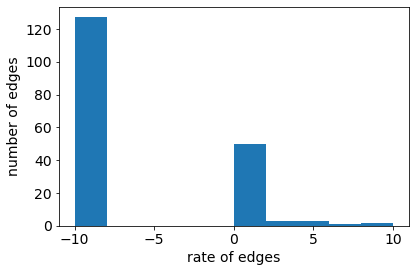

<ipython-input-26-33872eb6f9a7>:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


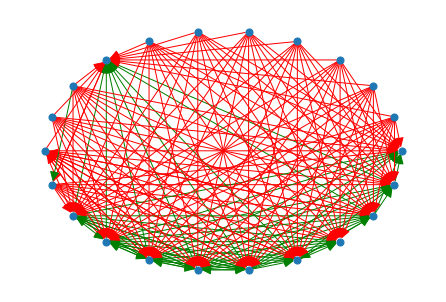

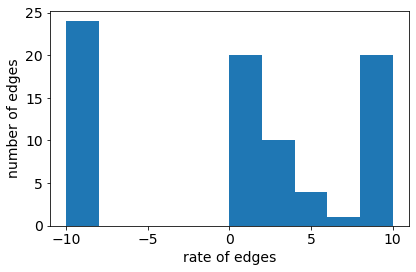

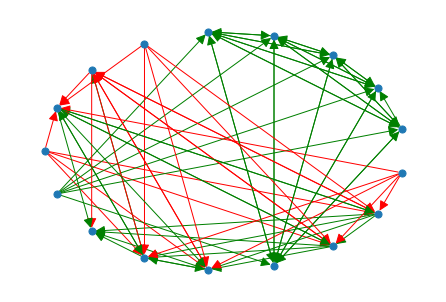

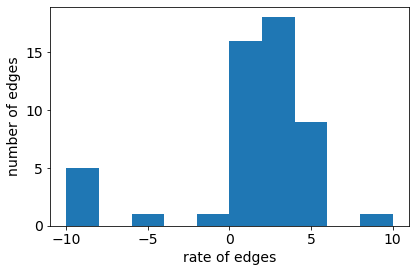

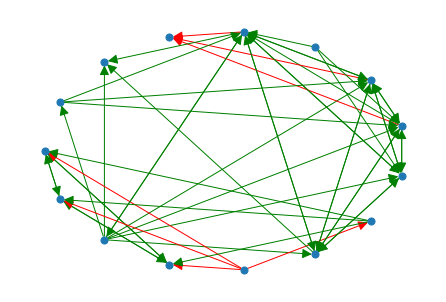

In [26]:
h_list = []
removed_nodes = []
pairs= [([list(i) for i in motif3[2][7]],1),([list(i) for i in motif3[2][8]],1),([list(i) for i in motif3[2][9]],-1)]
for i in range(3):
#     print('!!', len(pairs[0][0]))
    node_d, fibheap = init_heap_and_dict(pairs)
    results = peel_by_motif(node_d, fibheap, pairs, 1, False)
    H = num_labeled_G.subgraph(results[1])
    removed_nodes += list(H.nodes)
    h_list.append(H)
    
    rates = nx.get_edge_attributes(H, "rate")
    value_list = list(rates.values())
    vs = plt.hist(value_list)
    plt.ylabel('number of edges')
    plt.xlabel('rate of edges')
    plt.tight_layout()
    plt.savefig('figs/bitcoin_otc/contrast_8_9_10_hist'+str(i)+'.png')
    plt.show()
    
    colors = ['g' if H[u][v]['rate']>0 else 'r' for u,v in H.edges]
    nx.draw_shell(H, node_size=50, edge_color=colors, arrowsize=20)
    plt.tight_layout()
    plt.savefig('figs/bitcoin_otc/contrast_8_9_10_shape'+str(i)+'.png')
    plt.show()
    
    new_pairs = []
    for pair in pairs:
        temp_motif_list = []
#         print(len(pair[0]))
        for motif in pair[0]:
#             print(motif)
            flag = 0
            for node in motif:
                
                if node in removed_nodes:
                    flag = 1
                    break
            if flag == 0:
                temp_motif_list.append(motif)
        new_pairs.append((temp_motif_list, pair[1]))
#         print(len(temp_motif_list))
    pairs = new_pairs

# without contrast

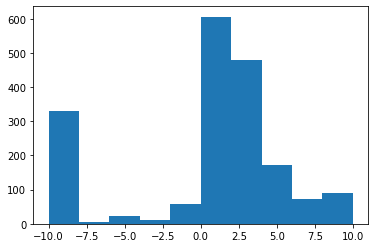

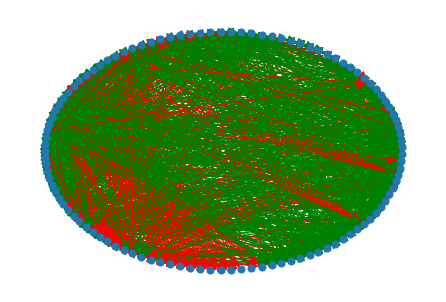

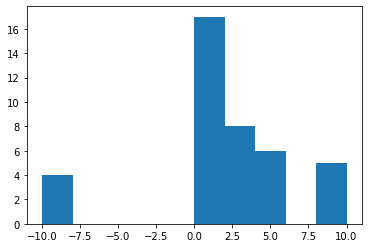

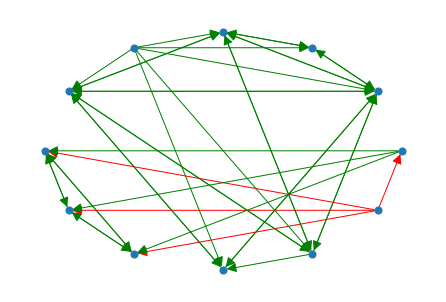

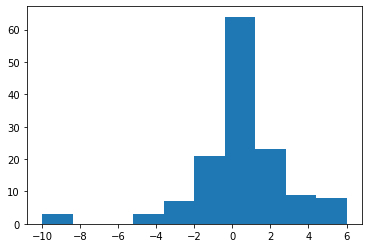

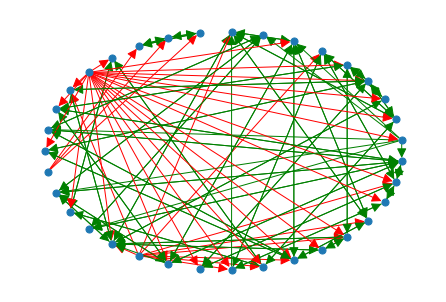

In [32]:
h_list = []
removed_nodes = []
pairs= [([list(i) for i in motif3[2][8]],1)]
for i in range(3):
#     print('!!', len(pairs[0][0]))
    node_d, fibheap = init_heap_and_dict(pairs)
    results = peel_by_motif(node_d, fibheap, pairs, 1, False)
    H = num_labeled_G.subgraph(results[1])
    removed_nodes += list(H.nodes)
    h_list.append(H)
    
    rates = nx.get_edge_attributes(H, "rate")
    value_list = list(rates.values())
    vs = plt.hist(value_list)
    plt.show()
    
    colors = ['g' if H[u][v]['rate']>0 else 'r' for u,v in H.edges]
    nx.draw_shell(H, node_size=50, edge_color=colors, arrowsize=20)
    plt.show()
    
    new_pairs = []
    for pair in pairs:
        temp_motif_list = []
#         print(len(pair[0]))
        for motif in pair[0]:
#             print(motif)
            flag = 0
            for node in motif:
                
                if node in removed_nodes:
                    flag = 1
                    break
            if flag == 0:
                temp_motif_list.append(motif)
        new_pairs.append((temp_motif_list, pair[1]))
#         print(len(temp_motif_list))
    pairs = new_pairs

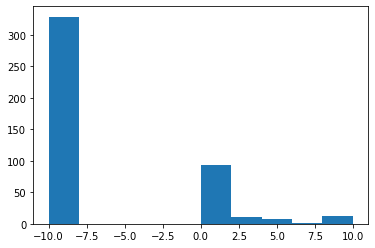

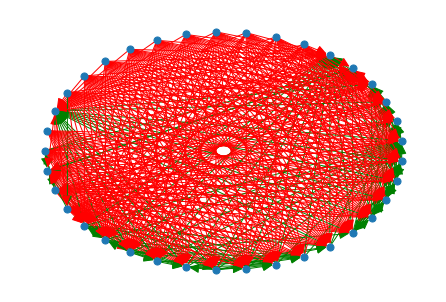

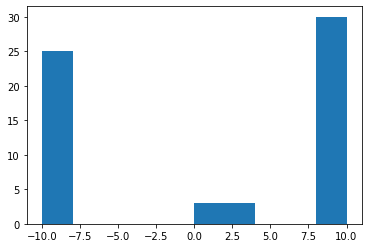

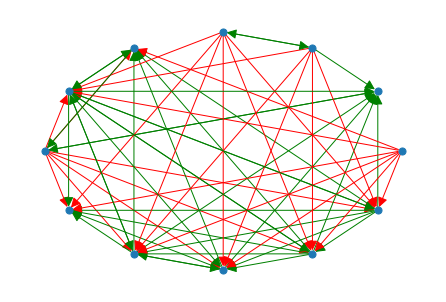

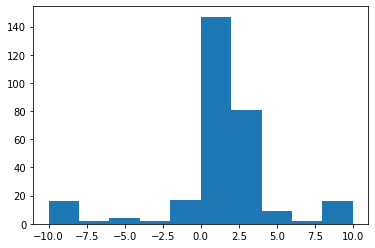

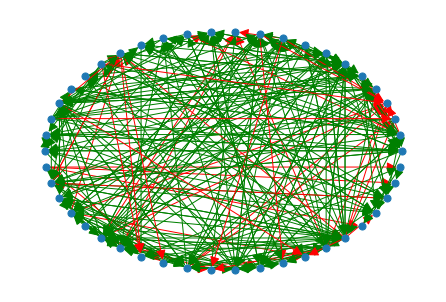

In [33]:
h_list = []
removed_nodes = []
pairs= [([list(i) for i in motif3[2][3]],1),([list(i) for i in motif3[2][12]],-1)]
for i in range(3):
#     print('!!', len(pairs[0][0]))
    node_d, fibheap = init_heap_and_dict(pairs)
    results = peel_by_motif(node_d, fibheap, pairs, 1, False)
    H = num_labeled_G.subgraph(results[1])
    removed_nodes += list(H.nodes)
    h_list.append(H)
    
    rates = nx.get_edge_attributes(H, "rate")
    value_list = list(rates.values())
    vs = plt.hist(value_list)
    plt.show()
    
    colors = ['g' if H[u][v]['rate']>0 else 'r' for u,v in H.edges]
    nx.draw_shell(H, node_size=50, edge_color=colors, arrowsize=20)
    plt.show()
    
    new_pairs = []
    for pair in pairs:
        temp_motif_list = []
#         print(len(pair[0]))
        for motif in pair[0]:
#             print(motif)
            flag = 0
            for node in motif:
                
                if node in removed_nodes:
                    flag = 1
                    break
            if flag == 0:
                temp_motif_list.append(motif)
        new_pairs.append((temp_motif_list, pair[1]))
#         print(len(temp_motif_list))
    pairs = new_pairs

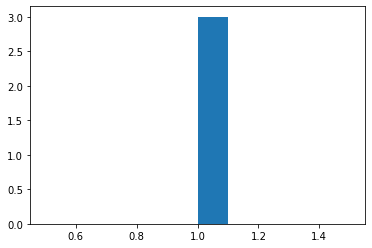

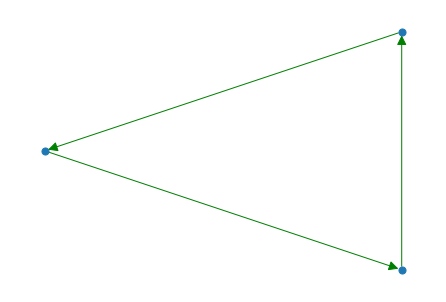

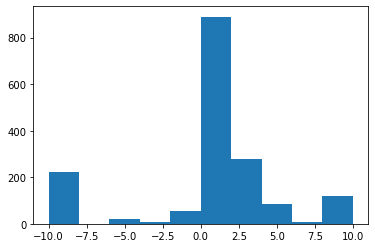

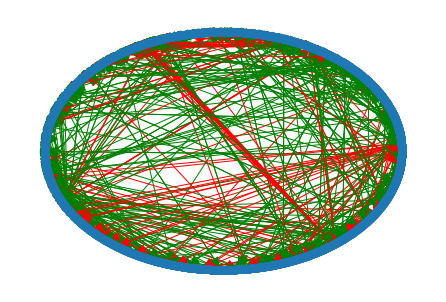

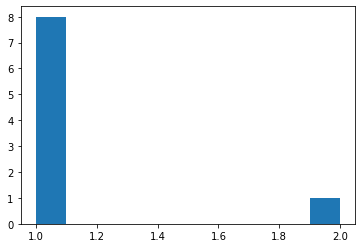

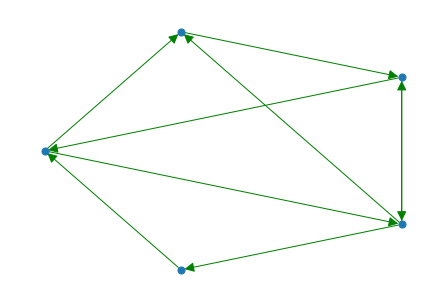

In [30]:
h_list = []
removed_nodes = []
pairs= [([list(i) for i in motif3[2][6]],1),([list(i) for i in motif3[2][9]],-1)]
for i in range(3):
#     print('!!', len(pairs[0][0]))
    node_d, fibheap = init_heap_and_dict(pairs)
    results = peel_by_motif(node_d, fibheap, pairs, 1, False)
    H = num_labeled_G.subgraph(results[1])
    removed_nodes += list(H.nodes)
    h_list.append(H)
    
    rates = nx.get_edge_attributes(H, "rate")
    value_list = list(rates.values())
    vs = plt.hist(value_list)
    plt.show()
    
    colors = ['g' if H[u][v]['rate']>0 else 'r' for u,v in H.edges]
    nx.draw_shell(H, node_size=50, edge_color=colors, arrowsize=20)
    plt.show()
    
    new_pairs = []
    for pair in pairs:
        temp_motif_list = []
#         print(len(pair[0]))
        for motif in pair[0]:
#             print(motif)
            flag = 0
            for node in motif:
                
                if node in removed_nodes:
                    flag = 1
                    break
            if flag == 0:
                temp_motif_list.append(motif)
        new_pairs.append((temp_motif_list, pair[1]))
#         print(len(temp_motif_list))
    pairs = new_pairs

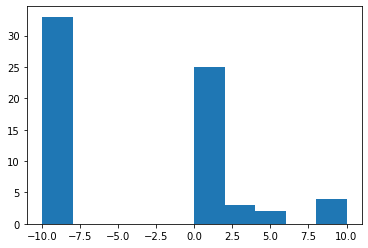

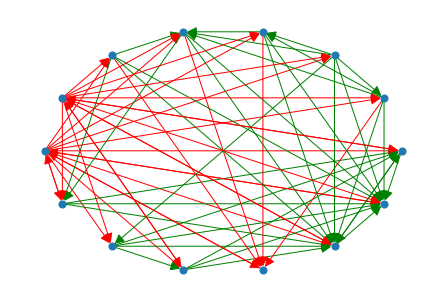

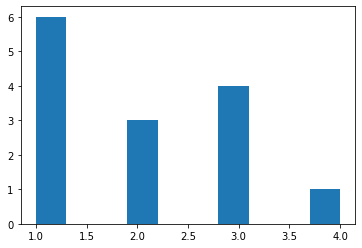

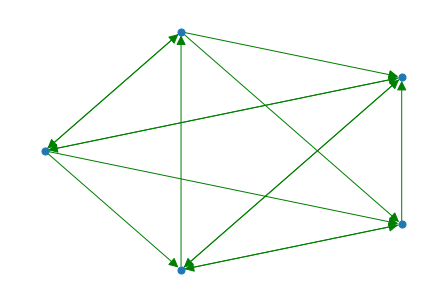

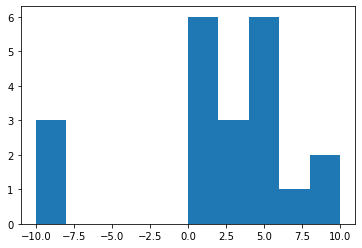

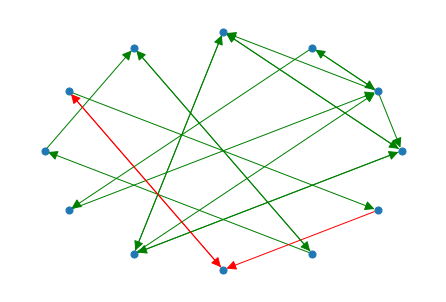

In [31]:
h_list = []
removed_nodes = []
pairs= [([list(i) for i in motif3[2][10]],1),([list(i) for i in motif3[2][9]],-1)]
for i in range(3):
#     print('!!', len(pairs[0][0]))
    node_d, fibheap = init_heap_and_dict(pairs)
    results = peel_by_motif(node_d, fibheap, pairs, 1, False)
    H = num_labeled_G.subgraph(results[1])
    removed_nodes += list(H.nodes)
    h_list.append(H)
    
    rates = nx.get_edge_attributes(H, "rate")
    value_list = list(rates.values())
    vs = plt.hist(value_list)
    plt.show()
    
    colors = ['g' if H[u][v]['rate']>0 else 'r' for u,v in H.edges]
    nx.draw_shell(H, node_size=50, edge_color=colors, arrowsize=20)
    plt.show()
    
    new_pairs = []
    for pair in pairs:
        temp_motif_list = []
#         print(len(pair[0]))
        for motif in pair[0]:
#             print(motif)
            flag = 0
            for node in motif:
                
                if node in removed_nodes:
                    flag = 1
                    break
            if flag == 0:
                temp_motif_list.append(motif)
        new_pairs.append((temp_motif_list, pair[1]))
#         print(len(temp_motif_list))
    pairs = new_pairs

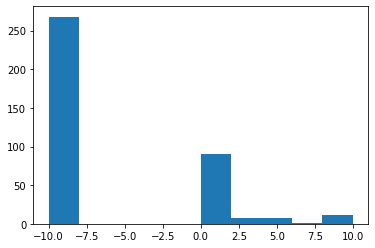

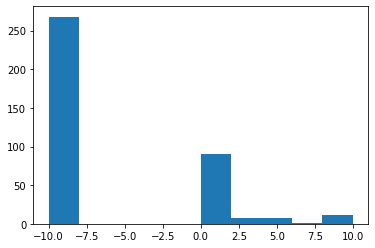

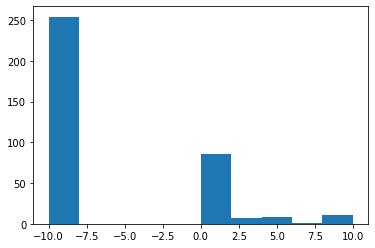

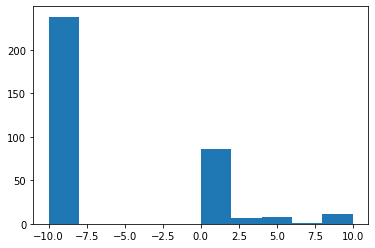

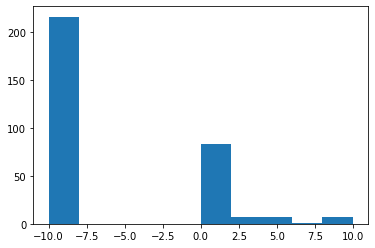

In [11]:
h_list = []
for neg in [-0.1,-0.5,-1,-5,-10]:
    pairs= [([list(i) for i in motif3[2][3]],0.1),([list(i) for i in motif3[2][6]],1),([list(i) for i in motif3[2][9]],neg)]
    node_d, fibheap = init_heap_and_dict(pairs)
    results = peel_by_motif(node_d, fibheap, pairs, 1, False)
    H = num_labeled_G.subgraph(results[1])
    h_list.append(H)
    rates = nx.get_edge_attributes(H, "rate")
    value_list = list(rates.values())
    vs = plt.hist(value_list)
    plt.show()

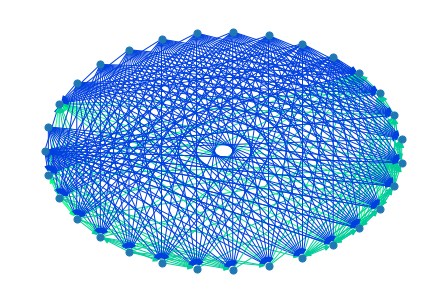

In [12]:
colors = [cmap(H[u][v]['rate']/20+0.75) for u,v in H.edges]
nx.draw_shell(H, node_size=50, edge_color=colors)
plt.show()

# undirected version

In [4]:
count = 0
node_map = {}
for u in G.nodes:
    node_map[u] = count
    count +=1

num_graph = nx.relabel_nodes(G, node_map, copy=True)
g = gt.Graph(directed=False)
g.add_edge_list(num_graph.edges)
square_sub = gt.Graph(directed=False)
square_sub.add_edge_list([(1,2),(2,3),(3,0),(0,1)])

start=datetime.now()
motif, counts = gt.motifs(g, 4, [0.9, 0.7, 0.5, 0.3], motif_list=[square_sub])
print(datetime.now()-start)

0:01:25.256502


In [5]:
triangle_sub = nx.Graph([(1,2),(2,3),(1,3)])
square_sub = nx.Graph([(1,2),(2,3),(3,4),(4,1)])

ismags1 = nx.isomorphism.ISMAGS(G, triangle_sub)
ismags2 = nx.isomorphism.ISMAGS(G, square_sub)
it = ismags1.find_isomorphisms()
cycls_3 = [list(dic.keys()) for dic in it]
start=datetime.now()
it = ismags2.find_isomorphisms()
cycls_4 = [list(dic.keys()) for dic in it]
print(datetime.now()-start)
# for i in it:
#     print(i)

0:40:13.665033


In [6]:
print('Original Graph.')
print('number of nodes', len(G.nodes), 'number of edges', len(G.edges))
print('number of triangles:',len(cycls_3), 'number of squares:', len(cycls_4))

Original Graph.
number of nodes 5881 number of edges 21492
number of triangles: 33493 number of squares: 333239


In [12]:
motif, counts[0]/0.9/0.7/0.5/0.3

([<Graph object, undirected, with 4 vertices and 4 edges, at 0x7ffddd27f610>],
 230740.74074074073)

In [7]:
bad_edges = []
for u,v in G.edges:
    if G[u][v]['rate']<0:
        bad_edges.append((u,v))
len(bad_edges)

3242

In [8]:
edge_induced = nx.Graph(bad_edges)
ismags1 = nx.isomorphism.ISMAGS(edge_induced, triangle_sub)
ismags2 = nx.isomorphism.ISMAGS(edge_induced, square_sub)
it = ismags1.find_isomorphisms()
bad_tri = [list(dic.keys()) for dic in it]
it = ismags2.find_isomorphisms()
bad_squ = [list(dic.keys()) for dic in it]
print('Graph with only bad edges.')
print('number of nodes', len(edge_induced.nodes), 'number of edges', len(edge_induced.edges))
print('number of triangles:',len(bad_tri), 'number of squares:', len(bad_squ))

Graph with only bad edges.
number of nodes 1601 number of edges 3242
number of triangles: 348 number of squares: 64577


In [9]:

node_induced = G.subgraph(edge_induced.nodes)
ismags1 = nx.isomorphism.ISMAGS(node_induced, triangle_sub)
ismags2 = nx.isomorphism.ISMAGS(node_induced, square_sub)
it = ismags1.find_isomorphisms()
bad_tri = [list(dic.keys()) for dic in it]
it = ismags2.find_isomorphisms()
bad_squ = [list(dic.keys()) for dic in it]
print('Let bad nodes be nodes that has bad connections. Bad node-induced graph:')
print('number of nodes', len(node_induced.nodes), 'number of edges', len(node_induced.edges))
print('number of triangles:',len(bad_tri), 'number of squares:', len(bad_squ))

Let bad nodes be nodes that has bad connections. Bad node-induced graph:
number of nodes 1601 number of edges 10140
number of triangles: 24107 number of squares: 213730


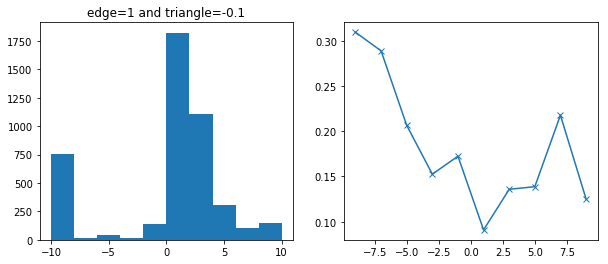

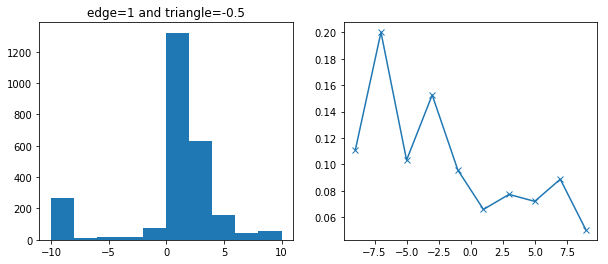

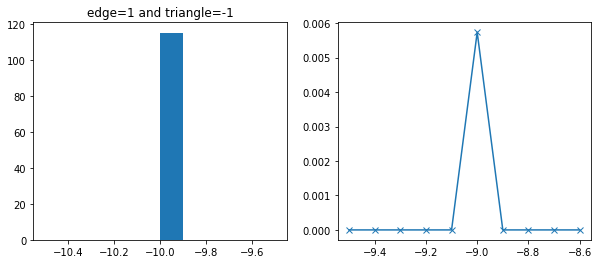

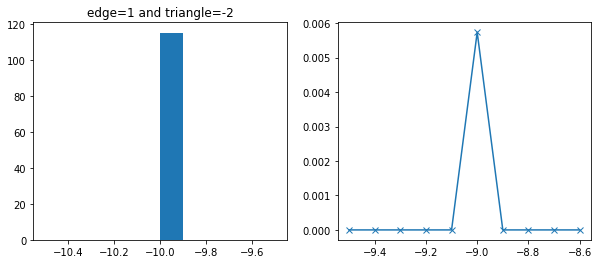

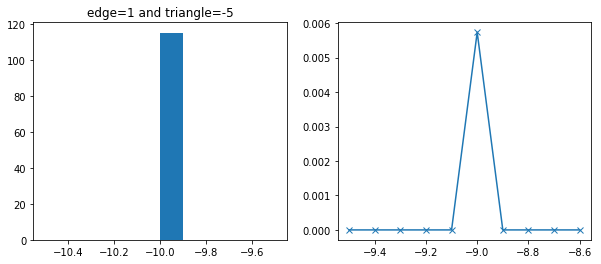

In [7]:
edge_value = 1
tri_value = -0.5
for tri_value in [-0.1, -0.5, -1, -2, -5]:
    node_d, fibheap = init_heap_and_dict([(edge_list,edge_value), (cycls_3,tri_value)])
    results = peel_by_motif(node_d, fibheap, [(edge_list,edge_value), (cycls_3,tri_value)], 1, False)
    H = G.subgraph(results[1])
    rates = nx.get_edge_attributes(H, "rate")
    value_list = list(rates.values())
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    vs = ax1.hist(value_list)
    ax1.set_title('edge='+str(edge_value)+' and triangle='+str(tri_value))
    ax2.plot(vs[1][:-1]+1,vs[0]/total_vs[0], marker='x')
    plt.show()

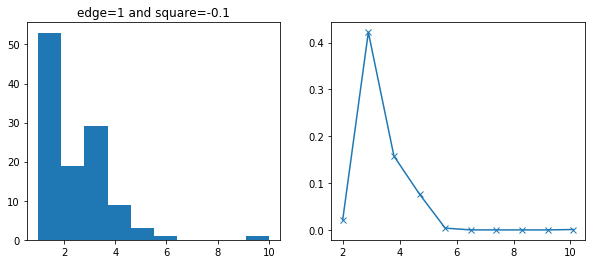

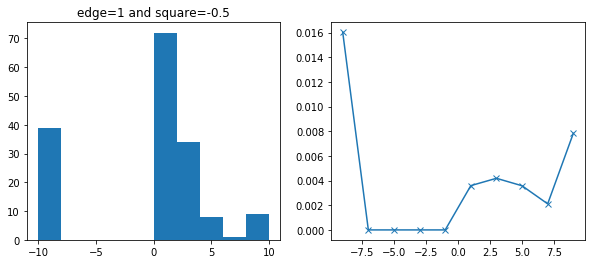

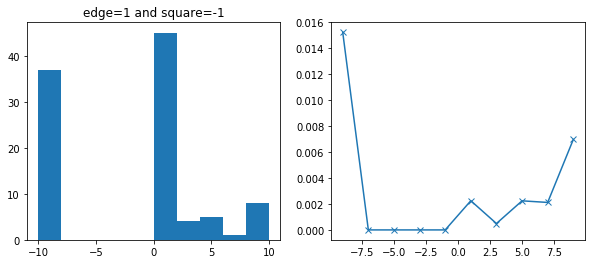

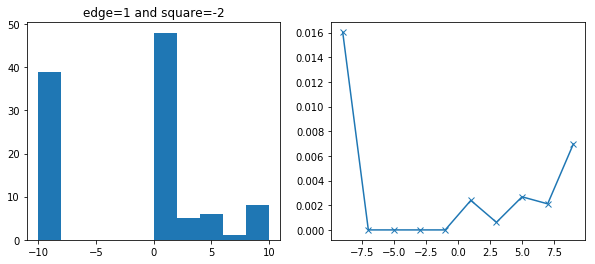

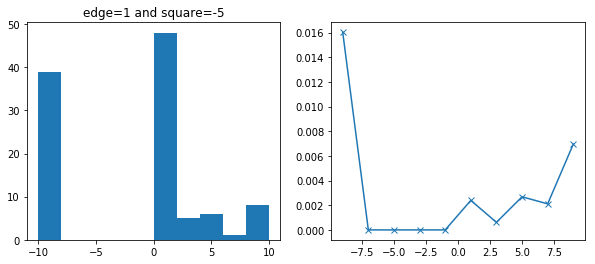

In [8]:
edge_value = 1
for squ_value in [-0.1, -0.5, -1, -2, -5]:
    node_d, fibheap = init_heap_and_dict([(edge_list,edge_value), (cycls_4,squ_value)])
    results = peel_by_motif(node_d, fibheap, [(edge_list,edge_value), (cycls_4,squ_value)], 1, False)
    H = G.subgraph(results[1])
    rates = nx.get_edge_attributes(H, "rate")
    value_list = list(rates.values())
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    vs = ax1.hist(value_list)
    ax1.set_title('edge='+str(edge_value)+' and square='+str(squ_value))
    ax2.plot(vs[1][:-1]+1,vs[0]/total_vs[0], marker='x')
    plt.show()

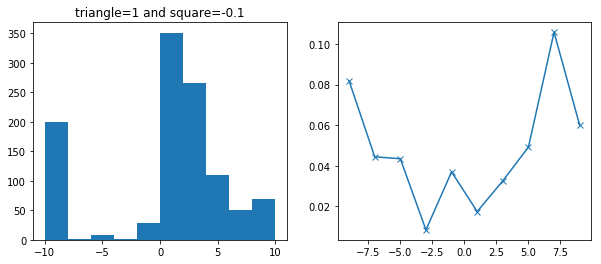

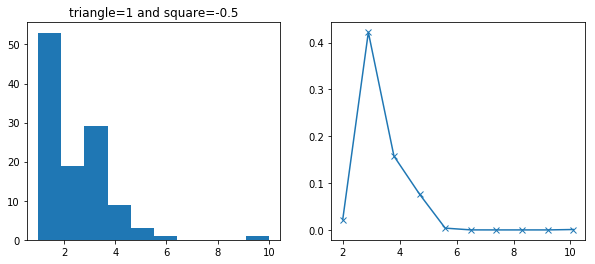

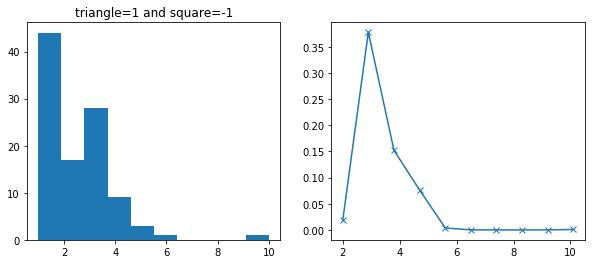

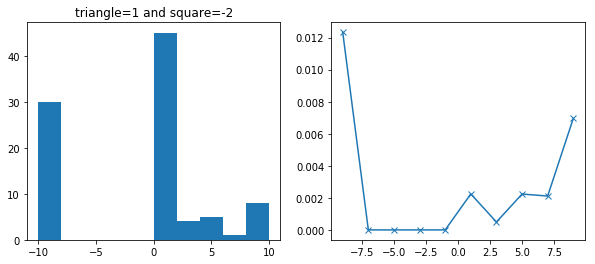

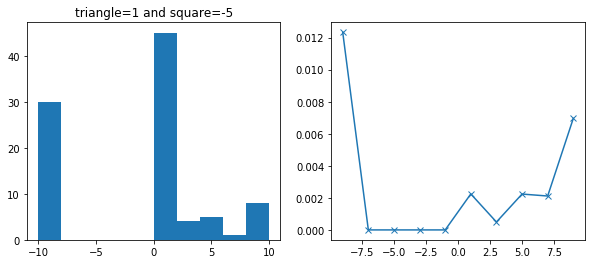

In [9]:
tri_value = 1
for squ_value in [-0.1, -0.5, -1, -2, -5]:
    node_d, fibheap = init_heap_and_dict([(cycls_3,tri_value), (cycls_4,squ_value)])
    results = peel_by_motif(node_d, fibheap, [(cycls_3,tri_value), (cycls_4,squ_value)], 1, False)
    H = G.subgraph(results[1])
    rates = nx.get_edge_attributes(H, "rate")
    value_list = list(rates.values())
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    vs = ax1.hist(value_list)
    ax1.set_title('triangle='+str(tri_value)+' and square='+str(squ_value))
    ax2.plot(vs[1][:-1]+1,vs[0]/total_vs[0], marker='x')
    plt.show()

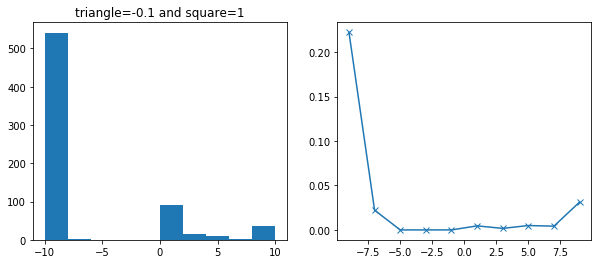

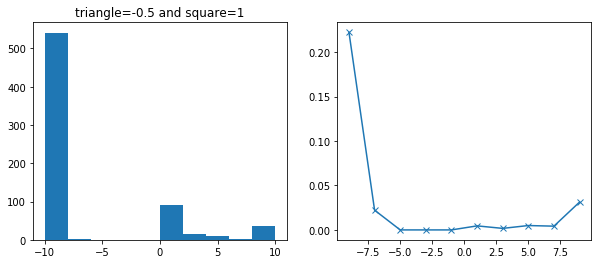

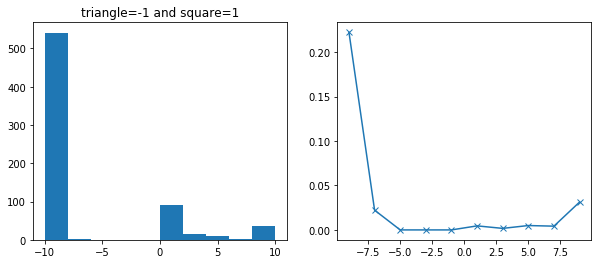

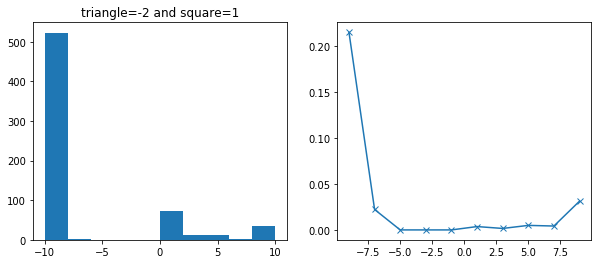

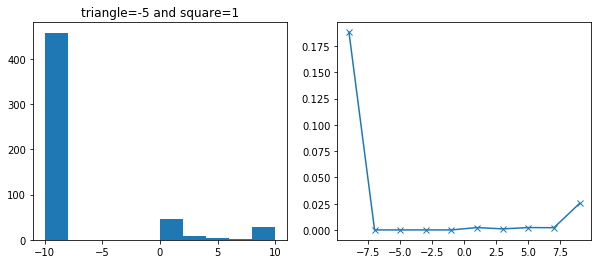

In [10]:
squ_value = 1
for tri_value in [-0.1, -0.5, -1, -2, -5]:
    node_d, fibheap = init_heap_and_dict([(cycls_3,tri_value), (cycls_4,squ_value)])
    results = peel_by_motif(node_d, fibheap, [(cycls_3,tri_value), (cycls_4,squ_value)], 1, False)
    H = G.subgraph(results[1])
    rates = nx.get_edge_attributes(H, "rate")
    value_list = list(rates.values())
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    vs = ax1.hist(value_list)
    ax1.set_title('triangle='+str(tri_value)+' and square='+str(squ_value))
    ax2.plot(vs[1][:-1]+1,vs[0]/total_vs[0], marker='x')
    plt.show()

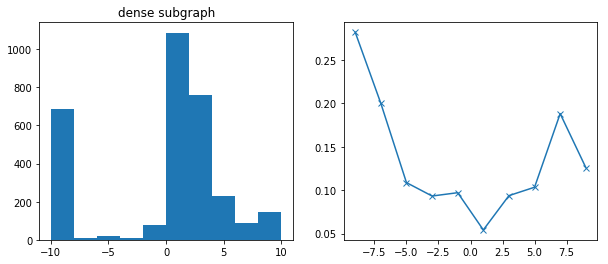

In [3]:

dense_sub = greedy_degree_density(G)
rates = nx.get_edge_attributes(dense_sub, "rate")
value_list = list(rates.values())
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
vs = ax1.hist(value_list)
ax1.set_title('dense subgraph')
ax2.plot(vs[1][:-1]+1,vs[0]/total_vs[0], marker='x')
plt.show()

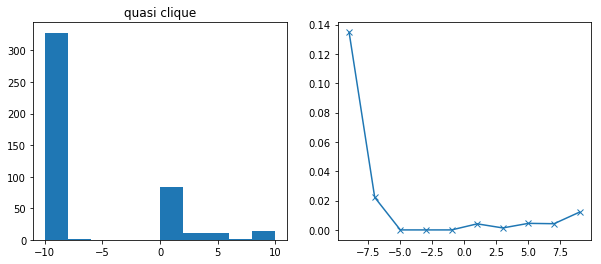

In [5]:

dense_sub = greedy_quasi_cliques(G, 0.5)
rates = nx.get_edge_attributes(dense_sub, "rate")
value_list = list(rates.values())
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
vs = ax1.hist(value_list)
ax1.set_title('quasi clique')
ax2.plot(vs[1][:-1]+1,vs[0]/total_vs[0], marker='x')
plt.show()

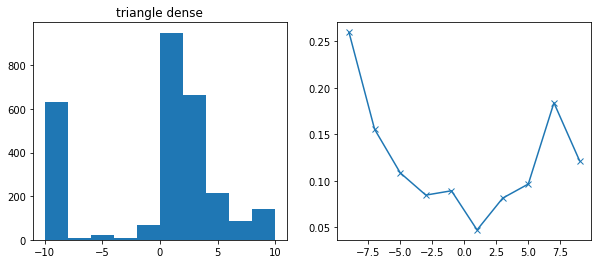

In [3]:

dense_sub = greedy_triangle_density(G)
rates = nx.get_edge_attributes(dense_sub, "rate")
value_list = list(rates.values())
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
vs = ax1.hist(value_list)
ax1.set_title('triangle dense')
ax2.plot(vs[1][:-1]+1,vs[0]/total_vs[0], marker='x')
plt.show()

In [3]:
ug = gt.Graph(directed=False)
index = 0
gt_node_map = {}
for n in G.nodes:
    gt_node_map[n] = index
    index += 1
labeld_G = nx.relabel_nodes(G, gt_node_map)
ug.add_edge_list(labeld_G.edges)

In [4]:
start=datetime.now()
motif4 = gt.motifs(ug, 4)
print(datetime.now()-start)

0:17:11.895564


In [5]:
start=datetime.now()
motif3 = gt.motifs(ug, 3)
print(datetime.now()-start)

0:00:04.871247


In [6]:
bad_edges = []
for u,v in G.edges:
    if G[u][v]['rate']<0:
        bad_edges.append((u,v))
len(bad_edges)
edge_induced = nx.Graph(bad_edges)
node_induced = G.subgraph(edge_induced.nodes)

In [7]:
bad_ug = gt.Graph(directed=False)
index = 0
gt_node_map = {}
for n in node_induced.nodes:
    gt_node_map[n] = index
    index += 1
labeld_G = nx.relabel_nodes(node_induced, gt_node_map)
bad_ug.add_edge_list(labeld_G.edges)

start=datetime.now()
bad_motif3 = gt.motifs(bad_ug, 3)
print(datetime.now()-start)
start=datetime.now()
bad_motif4 = gt.motifs(bad_ug, 4)
print(datetime.now()-start)

0:00:00.969468
0:01:22.748798


In [9]:
edge_ug = gt.Graph(directed=False)
index = 0
gt_node_map = {}
for n in edge_induced.nodes:
    gt_node_map[n] = index
    index += 1
labeld_G = nx.relabel_nodes(edge_induced, gt_node_map)
edge_ug.add_edge_list(labeld_G.edges)

start=datetime.now()
edge_motif3 = gt.motifs(edge_ug, 3)
print(datetime.now()-start)
start=datetime.now()
edge_motif4 = gt.motifs(edge_ug, 4)
print(datetime.now()-start)

0:00:00.161753
0:00:07.177404


In [1]:
labels = ['edge','wedge','triangle','4-star','4-path','triangle-','square','square-','4-clique']
plt.plot(labels, [len(G.edges)]+motif3[1]+motif4[1], label='original')
plt.plot(labels, [len(node_induced.edges)]+bad_motif3[1]+bad_motif4[1], label='node-induced bad subgraph')
plt.plot(labels, [len(edge_induced.edges)]+edge_motif3[1]+edge_motif4[1], label='edge bad subgraph')
plt.yscale('log')
plt.legend()
plt.xticks(rotation=60)
plt.tight_layout() 

NameError: name 'plt' is not defined